/home/lazar/Fak(s)/AF/prakse/SDSA/data/3481_11923_SHARP_CEA_enhanced_norm/hmi.sharp_cea_720s.3481.20131213_111200_TAI.enhanced_normalized.fits


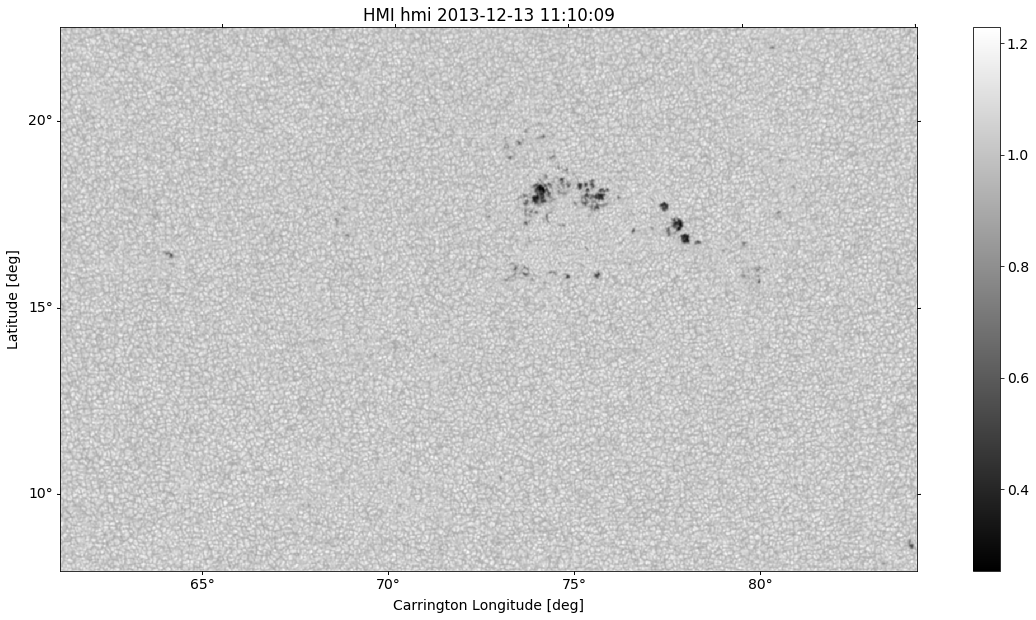

In [92]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np
from scipy.spatial import distance_matrix

import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames


import os
import glob
# This makes nice big plots for matplotlib
import matplotlib as mpl
params = {'font.size': 14,
          'figure.figsize': (20.0, 10.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'animation.embed_limit': 2048,
          }
mpl.rcParams.keys()
mpl.rcParams.update(params)
np.set_printoptions(suppress=True)

import sunpy.map
from sunpy.coordinates import frames

data_dir = os.path.abspath("/home/lazar/Fak(s)/AF/prakse/SDSA/data")

cont_list = sorted(glob.glob(os.path.join(
    data_dir, "3481_11923_SHARP_CEA_enhanced_norm/*enhanced_normalized*")))


magnetic_data_dir = os.path.join(
    data_dir, "3481_11923_SHARP_CEA_upscaled_magnetic_data")
Br_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Br*")))
Bp_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Bp*")))
Bt_list = sorted(glob.glob(os.path.join(
    magnetic_data_dir, "*Bt*")))
patches_dir = os.path.join(data_dir, "3481_11923_SHARP_CEA_patches")
patches_list = sorted(glob.glob(os.path.join(patches_dir, "*patches*")))
print(cont_list[600])
mapa = sunpy.map.Map(cont_list[600])
helioproj_limb = sunpy.map.all_coordinates_from_map(mapa).transform_to(
        frames.Helioprojective(observer=mapa.observer_coordinate))
mapa.peek()

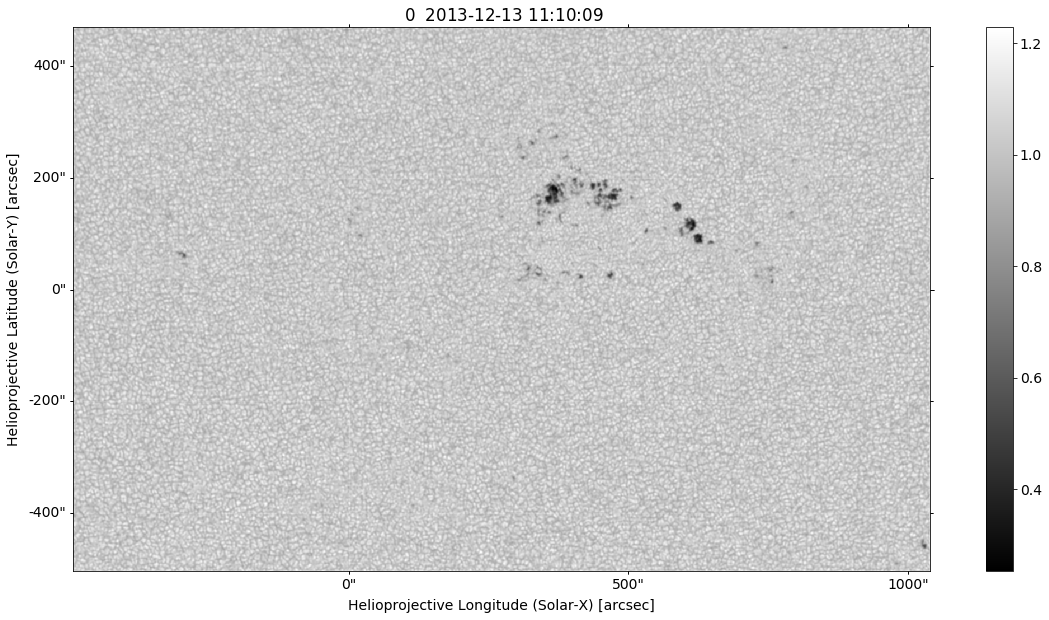

In [107]:
#print(dir(mapa))
#print(mapa.world_to_pixel)

#Fetch the coordinates of reference pixel
hpc1 = SkyCoord(mapa.reference_coordinate, frame=mapa.coordinate_frame)  


#print(mapa.obstime)
#Create reference frame for helioprojective with observer coordinates and observer date
hps1 = sunpy.coordinates.Helioprojective(observer=mapa.observer_coordinate, obstime=mapa.date)

#Transform carrington to helioprojective
hp = hpc1.transform_to(hps1)



#print(hpc1.transform_to(hps1))
#reference_helioproj = mapa.reference_coordinate.transform_to(frames.)
helioproj_limb = sunpy.map.all_coordinates_from_map(mapa).transform_to(
        frames.Helioprojective(observer=mapa.observer_coordinate))



#my_coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime="2017-08-01",
#                    observer = 'earth', frame=frames.Helioprojective)

my_header = sunpy.map.make_fitswcs_header(mapa.data, hp)

#print(my_header)
my_map = sunpy.map.Map(mapa.data, my_header)

#my_map
my_map.peek()


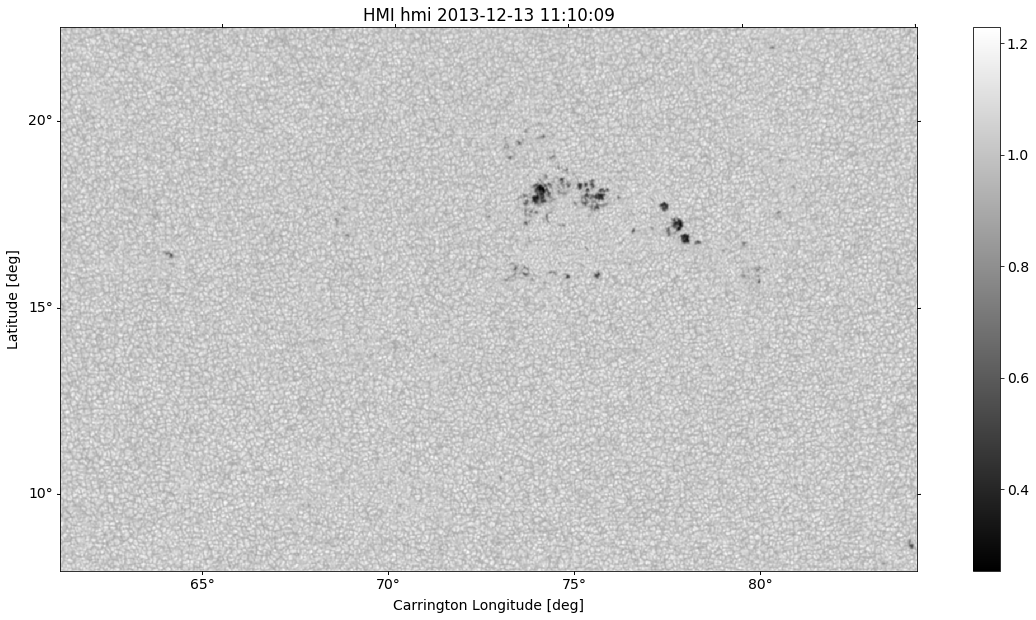

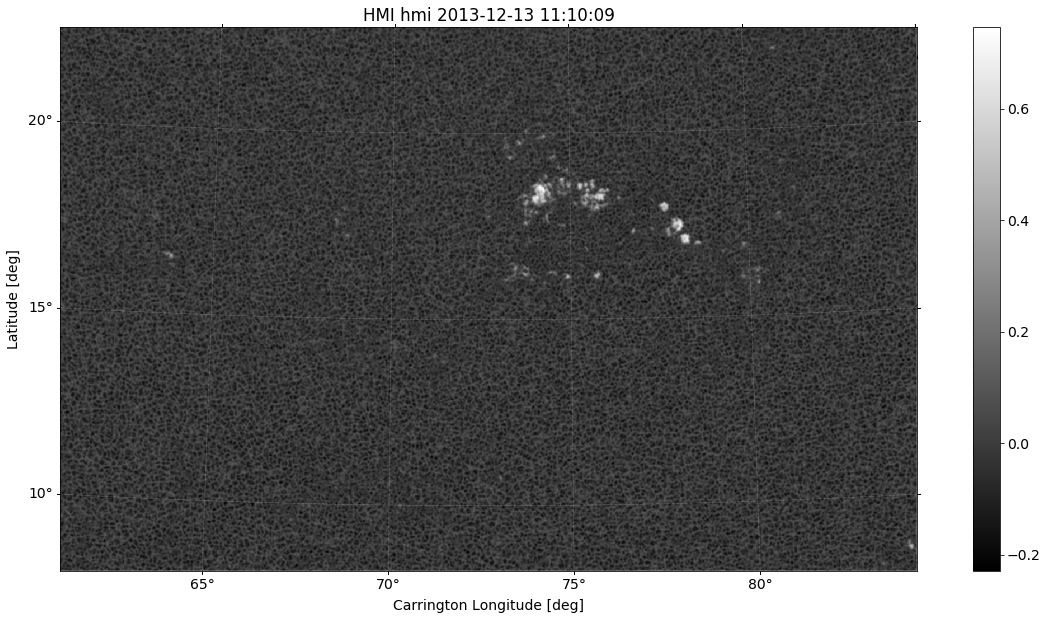

SpatialPair(axis1=<Quantity 0.015 deg / pix>, axis2=<Quantity 0.015 deg / pix>)
SpatialPair(axis1=<Quantity 0.50436 arcsec / pix>, axis2=<Quantity 0.50436 arcsec / pix>)


In [108]:
map1 = sunpy.map.Map("../../hmi.Ic_noLimbDark_720s.20120806_120000_TAI.1.continuum.fits")
#map1 = map1.resample((1024, 1024)*u.pix)
#map1.peek()
#mapa_full_disk = sunpy.map.Map(invert(map1.data), map1.meta)
#mapa_full_disk.peek()
mapa.peek()
data = invert(mapa.data)
new_map = sunpy.map.Map(data, mapa.meta)
new_map.peek()
circle_radius = 40 * u.arcsec
median_box = 10 * u.arcsec
print(mapa.scale)
print(map1.scale)

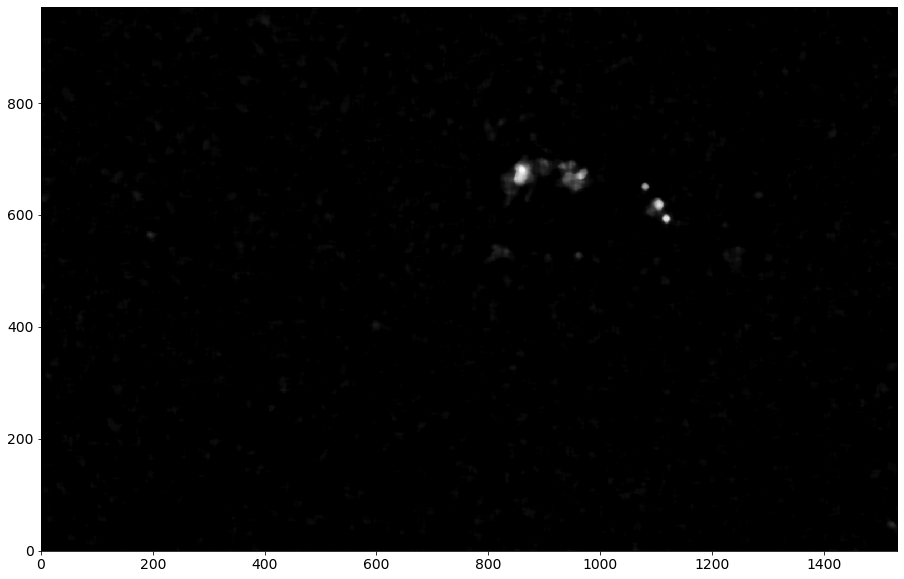

In [127]:
data = invert(mapa.data)
#plt.imshow(data,cmap='gray')
#plt.colorbar()
med = median(data, square(15))
plt.imshow(med, cmap='gray', origin='lower')


79


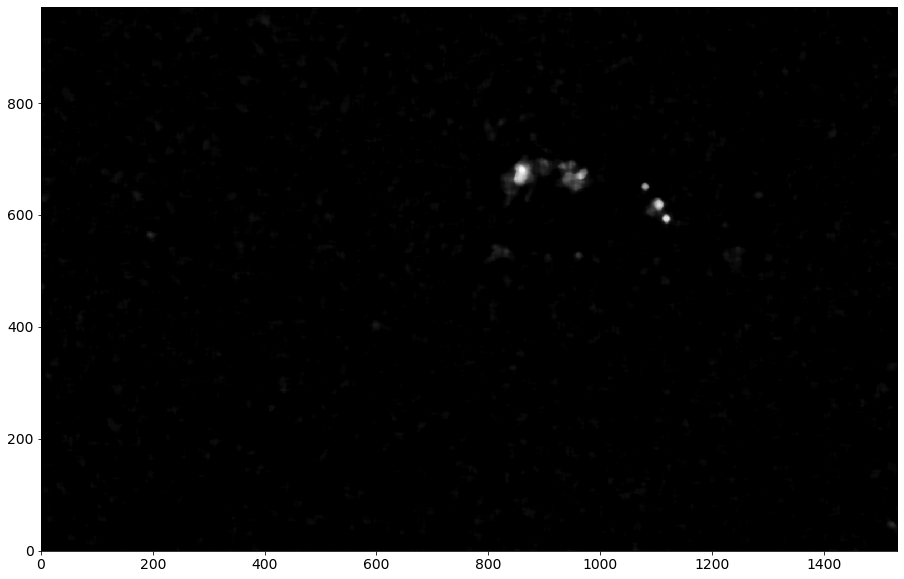

In [130]:
circle=disk(40)
#plt.imshow(med)

th = white_tophat(med, circle)
plt.imshow(th, cmap='gray', origin='lower')

In [131]:
finite = th
finite[np.isnan(th)] = 0

segmentation = finite > np.percentile(finite, 99.8)
labelled = label(segmentation)
regions = regionprops(labelled)

/home/lazar/Fak(s)/AF/prakse/SDSA/hmi_data/venv/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:225: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


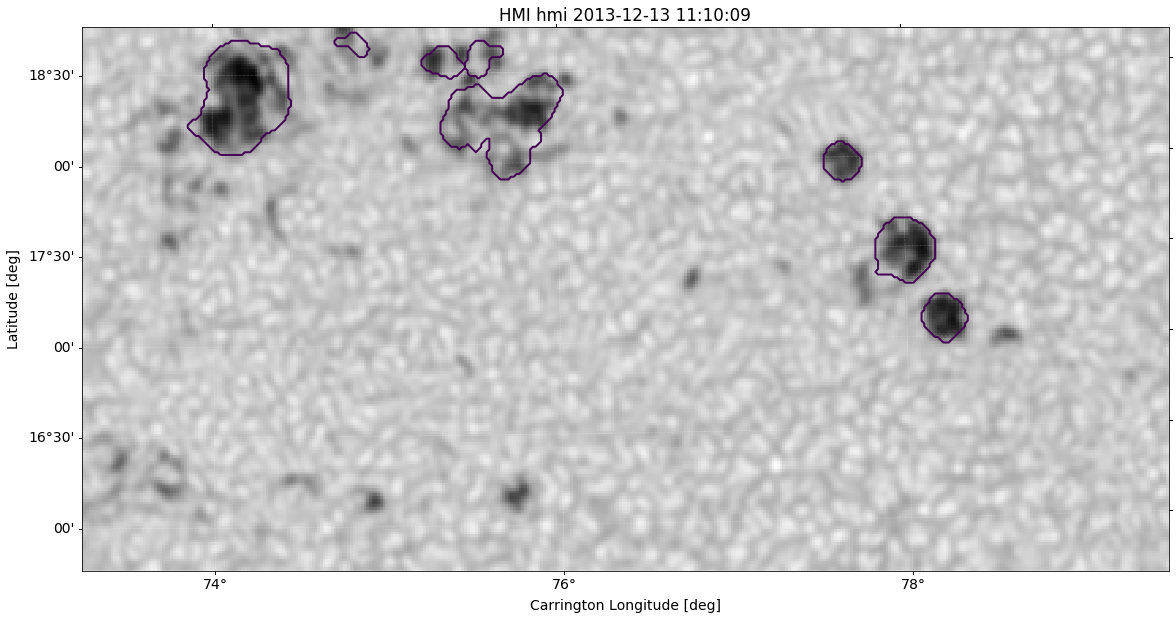

In [160]:
plt.figure()

ax = plt.subplot(projection=mapa)
mapa.plot()
plt.xlim([800, 1200])
plt.ylim([500, 700])
ax.contour(segmentation, levels=0)
plt.savefig('JEDAN.jpg')
plt.show()

In [ ]:
th = white_tophat(med, circle)

finite = th
finite[np.isnan(th)] = 0

segmentation = finite > np.percentile(finite, 99.8)
labelled = label(segmentation)
regions = regionprops(labelled)

plt.figure()
ax = plt.subplot(projection=map1)
map1.plot()
ax.contour(segmentation, levels=0)

plt.show()